In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from neura_dual_quaternions import Quaternion, DualQuaternion
from DualQuaternionQuinticBlends.LineGenerator import LineGenerator
from DualQuaternionQuinticBlends.ArcGenerator import ArcGenerator
from DualQuaternionQuinticBlends.DQQBTrajectoryGenerator import DQQBTrajectoryGenerator
#mpl.rcParams['text.usetex'] = True

# define orientation quaternions for test trajectory
q1 = Quaternion(0.454, -0.891, -0.000, -0.000)
q2 = Quaternion(0.321, -0.630, -0.630, 0.321)
q3 = Quaternion(0.219, -0.219, -0.672, 0.672)

# define dual quaternions for linear interpolation
dq1 = DualQuaternion.fromQuatPos(q1, np.array([-0.4, 0, 0]))
dq2 = DualQuaternion.fromQuatPos(q1, np.array([0, 0, 0 ]))
dq3 = DualQuaternion.fromQuatPos(q2, np.array([0, 0, 0 ]))
dq4 = DualQuaternion.fromQuatPos(q3, np.array([0, 0.3, 0 ]))

print(dq1)
print(dq2)
print(dq3)
print(dq4)

# assign dual quaternions to lists
line_DQ_list = [dq1, dq2, dq3, dq4]

# initialize line and arc generators
line_generator = LineGenerator()

# define desired cartesian velocites and maximum angular velocity
des_cart_vel_line = 0.5
max_ang_vel = 1

# generate segments
line_segments = line_generator.generateSegments(line_DQ_list, des_cart_vel_line, max_ang_vel)

# merge segments into one segment list
segments = line_segments

DualQuaternion(Real: Quaternion(0.454, -0.891, -0.000, -0.000), Dual: Quaternion(-0.178, -0.091, 0.000, 0.000))
DualQuaternion(Real: Quaternion(0.454, -0.891, -0.000, -0.000), Dual: Quaternion(0.000, 0.000, 0.000, 0.000))
DualQuaternion(Real: Quaternion(0.321, -0.630, -0.630, 0.321), Dual: Quaternion(0.000, 0.000, 0.000, 0.000))
DualQuaternion(Real: Quaternion(0.219, -0.219, -0.672, 0.672), Dual: Quaternion(0.101, 0.101, 0.033, 0.033))


In [24]:
# define the acceleration and jerk limits
a_cart_max = 1
j_cart_max = 10
a_ang_max = 2
j_ang_max = 15

# generate trajectory object with the segments defined above
trajectory = DQQBTrajectoryGenerator()

trajectory.generateDynamicTrajectory(segments, a_cart_max, j_cart_max, a_ang_max, j_ang_max)

iteration:  1
acceleration limit violated!
acceleration limit violated!
acceleration limit violated!
acceleration limit violated!
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


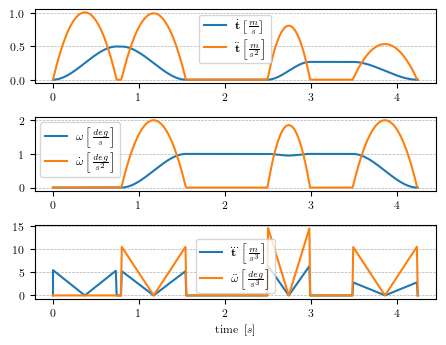

In [34]:
time_vec = np.arange(0, trajectory.time_vector[-1]+0.01, 0.01)

time = [0]
vel_norm_list = [0]
acc_norm_list = [0]
jerk_norm_list = [0]

ang_vel_norm_list = [0]
ang_acc_norm_list = [0]
ang_jerk_norm_list = [0]

quaternion_list = []

x = []
y = []
z = []

for t in time_vec:
    time.append(t)
    pos, vel, acc, jerk, quaternion, ang_vel, ang_acc, ang_jerk = trajectory.evaluate(t)
    
    if t == time_vec[-1]:
        vel_norm_list.append(0)
        acc_norm_list.append(0)
        jerk_norm_list.append(0)

        ang_vel_norm_list.append(0)
        ang_acc_norm_list.append(0)
        ang_jerk_norm_list.append(0)
    else:
        vel_norm_list.append(np.linalg.norm(vel))
        acc_norm_list.append(np.linalg.norm(acc))
        jerk_norm_list.append(np.linalg.norm(jerk))

        ang_vel_norm_list.append(np.linalg.norm(ang_vel))
        ang_acc_norm_list.append(np.linalg.norm(ang_acc))
        ang_jerk_norm_list.append(np.linalg.norm(ang_jerk))
    
    quaternion_list.append(quaternion)
    
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
text_size = 8
plt.rcParams['font.size'] = text_size  # Adjust this value as needed
plt.rcParams['axes.labelsize'] = text_size  # For x and y labels
plt.rcParams['xtick.labelsize'] = text_size  # For x tick labels
plt.rcParams['ytick.labelsize'] = text_size  # For y tick labels
plt.rcParams['legend.fontsize'] = text_size  # For legend

width_cm = 7.8


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4.5, 3.5))

ax1.plot(time, vel_norm_list, label = r'$\dot{\mathbf{t}} \left[ \frac{m}{s} \right]$')
ax1.plot(time, acc_norm_list, label = r'$\ddot{\mathbf{t}} \left[ \frac{m}{s^2} \right]$')
ax1.set_yticks(np.arange(0, 1 + 0.5, 0.5))
ax1.legend()

ax2.plot(time, ang_vel_norm_list, label = r'$\mathbf{\omega} \left[ \frac{deg}{s} \right]$')
ax2.plot(time, ang_acc_norm_list, label = r'$\dot{\mathbf{\omega}} \left[ \frac{deg}{s^2} \right]$')
ax2.set_yticks(np.arange(0, 2 + 1, 1))
ax2.legend()

ax3.plot(time, jerk_norm_list, label =r'$\dddot{\mathbf{t}} \left[ \frac{m}{s^3} \right]$')
ax3.plot(time, ang_jerk_norm_list, label = r'$\ddot{\mathbf{\omega}} \left[ \frac{deg}{s^3} \right]$')
ax3.set_yticks(np.arange(0, 15 + 5, 5))
ax3.set_xlabel(r'$\textrm{time } \left[ s \right]$')
ax3.legend()

ax1.grid(True,axis='y', which='both', linestyle='--', linewidth=0.5)
ax2.grid(True,axis='y', which='both', linestyle='--', linewidth=0.5)
ax3.grid(True,axis='y', which='both', linestyle='--', linewidth=0.5)

# # Adjust the layout and display the plot
plt.tight_layout()
#plt.show() = 
plt.savefig("norm_resultsx.eps")

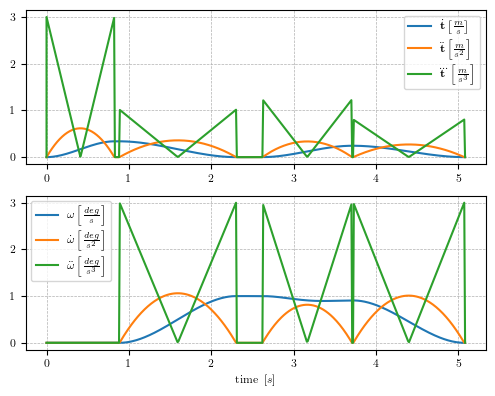

In [8]:
time_vec = np.arange(0, trajectory.time_vector[-1]+0.01, 0.01)

time = [0]
vel_norm_list = [0]
acc_norm_list = [0]
jerk_norm_list = [0]

ang_vel_norm_list = [0]
ang_acc_norm_list = [0]
ang_jerk_norm_list = [0]

quaternion_list = []

x = []
y = []
z = []

for t in time_vec:
    time.append(t)
    pos, vel, acc, jerk, quaternion, ang_vel, ang_acc, ang_jerk = trajectory.evaluate(t)
    
    if t == time_vec[-1]:
        vel_norm_list.append(0)
        acc_norm_list.append(0)
        jerk_norm_list.append(0)

        ang_vel_norm_list.append(0)
        ang_acc_norm_list.append(0)
        ang_jerk_norm_list.append(0)
    else:
        vel_norm_list.append(np.linalg.norm(vel))
        acc_norm_list.append(np.linalg.norm(acc))
        jerk_norm_list.append(np.linalg.norm(jerk))

        ang_vel_norm_list.append(np.linalg.norm(ang_vel))
        ang_acc_norm_list.append(np.linalg.norm(ang_acc))
        ang_jerk_norm_list.append(np.linalg.norm(ang_jerk))
    
    quaternion_list.append(quaternion)
    
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
text_size = 8
plt.rcParams['font.size'] = text_size  # Adjust this value as needed
plt.rcParams['axes.labelsize'] = text_size  # For x and y labels
plt.rcParams['xtick.labelsize'] = text_size  # For x tick labels
plt.rcParams['ytick.labelsize'] = text_size  # For y tick labels
plt.rcParams['legend.fontsize'] = text_size  # For legend

width_cm = 7.8


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4))

ax1.plot(time, vel_norm_list, label = r'$\dot{\mathbf{t}} \left[ \frac{m}{s} \right]$')
ax1.plot(time, acc_norm_list, label = r'$\ddot{\mathbf{t}} \left[ \frac{m}{s^2} \right]$')
ax1.plot(time, jerk_norm_list, label =r'$\dddot{\mathbf{t}} \left[ \frac{m}{s^3} \right]$')
ax1.legend()

ax2.plot(time, ang_vel_norm_list, label = r'$\mathbf{\omega} \left[ \frac{deg}{s} \right]$')
ax2.plot(time, ang_acc_norm_list, label = r'$\dot{\mathbf{\omega}} \left[ \frac{deg}{s^2} \right]$')
ax2.plot(time, ang_jerk_norm_list, label = r'$\ddot{\mathbf{\omega}} \left[ \frac{deg}{s^3} \right]$')
ax2.set_xlabel(r'$\textrm{time } \left[ s \right]$')
ax2.legend()


ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# # Adjust the layout and display the plot
plt.tight_layout()
plt.show()
#plt.savefig("norm_resultsx.eps")